In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
df=pd.read_csv("prices-split-adjusted.csv", index_col=0)

In [3]:
dfa = df[df['symbol'] == 'AAPL']

In [4]:
# Convert index to pandas datetime
dfa.index = pd.to_datetime(dfa.index, format="%Y/%m/%d")

In [5]:
df_final = dfa.drop(['symbol','open','low','high','volume'], axis=1)

In [6]:
# Conver to Series to run Dickey-Fuller test
apple = pd.Series(df_final['close'])

In [7]:
# split the data 70/30 with 70% training, 30% testing
train_data = apple.iloc[:int(apple.shape[0]*0.7)]
test_data = apple.iloc[int(apple.shape[0]*0.7):]

Text(0.5, 1.0, 'Time Series Plot')

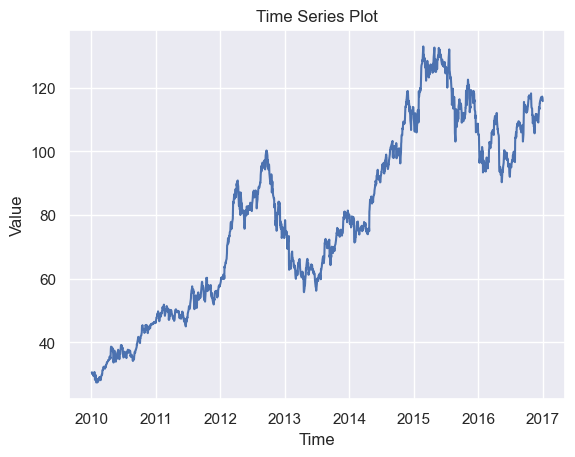

In [8]:
sns.set(style="darkgrid")  # Set a style for the plot
sns.lineplot(data=apple)

# Set labels and title
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time Series Plot")

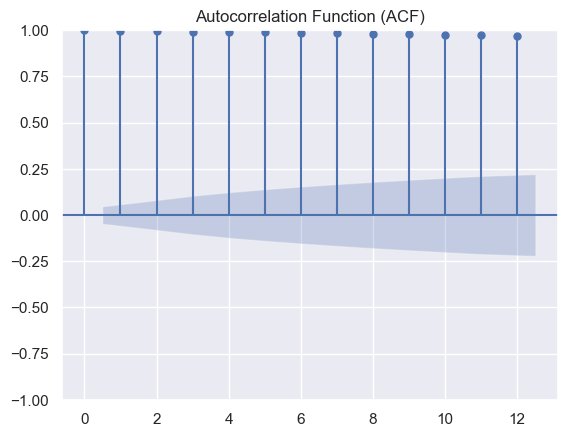

In [9]:
# Create ACF plot
plot_acf(apple, lags=12)  # 'lags' specifies the number of lags to include in the plot
plt.title('Autocorrelation Function (ACF)')
plt.show()

/Users/katie/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


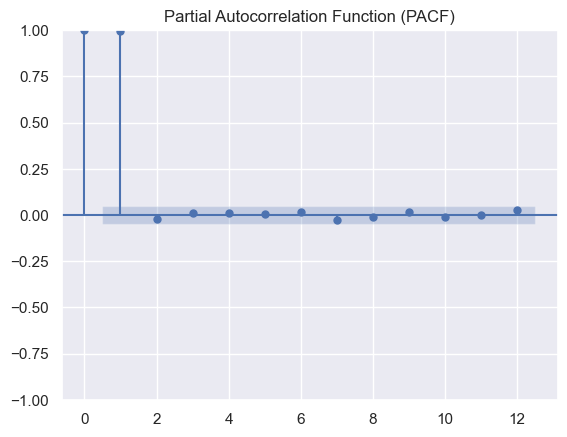

In [10]:
# Create PACF plot
plot_pacf(apple, lags=12)  # 'lags' specifies the number of lags to include in the plot
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

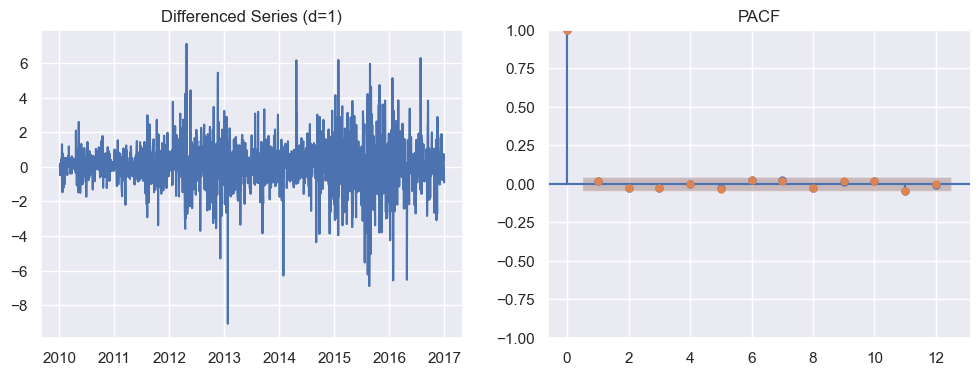

In [11]:
# Calculate the differenced series
d=1
differenced_series = apple.diff(periods=d).fillna(0)

# Plot the differenced series
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(differenced_series)
plt.title(f'Differenced Series (d={d})')

# Plot ACF and PACF
plt.subplot(122)
plot_acf(differenced_series, lags=12, ax=plt.gca(), title='ACF')
plot_pacf(differenced_series, lags=12, ax=plt.gca(), title='PACF')

plt.show()

In [12]:
# split the data 70/30 with 70% training, 30% testing
train_data = apple.iloc[:int(apple.shape[0]*0.7)]
test_data = apple.iloc[int(apple.shape[0]*0.7):]

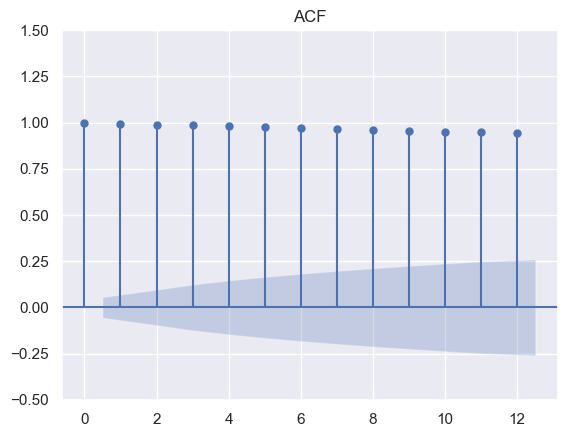

In [13]:
# Create ACF plot
fig, ax = plt.subplots()
plot_acf(train_data, lags=12, ax=ax)  # 'lags' specifies the number of lags to include in the plot
ax.set_ylim(-0.5, 1.5)  # Set the y-axis limits
plt.title('ACF')
plt.show()

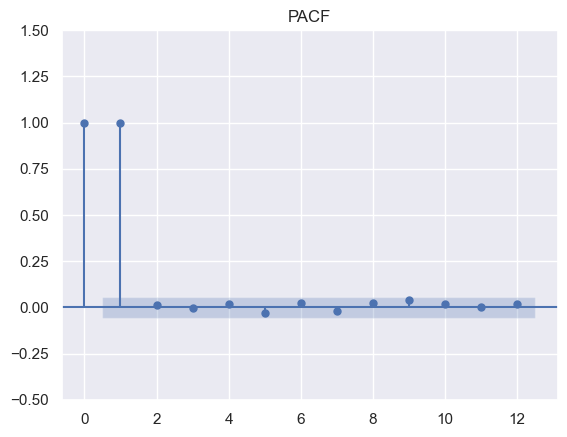

In [14]:
# Create PACF plot
fig, ax = plt.subplots()
plot_pacf(train_data, lags=12, ax=ax) # 'lags' specifies the number of lags to include in the plot
ax.set_ylim(-0.5, 1.5)
plt.title('PACF')
plt.show()

/Users/katie/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


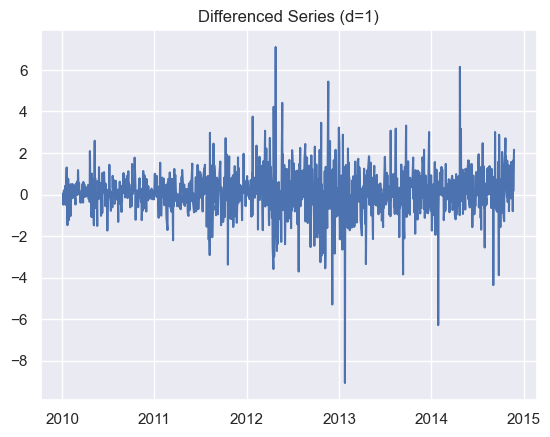

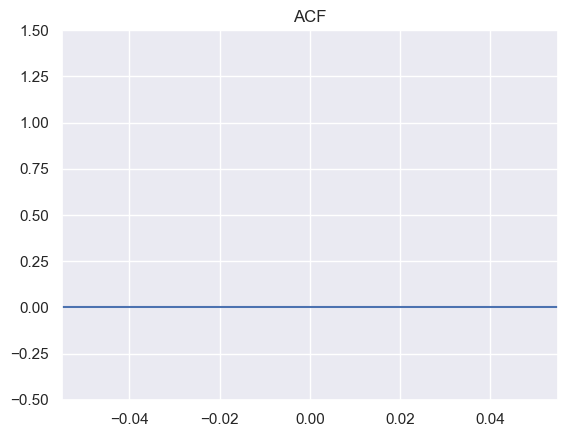

In [15]:
# Calculate the differenced series
d=1
differenced_series = train_data.diff(periods=d)
# Plot the differenced series

plt.plot(differenced_series)
plt.title(f'Differenced Series (d={d})')

# Plot ACF and PACF
fig, ax = plt.subplots()
plot_acf(differenced_series, lags=12, title='ACF', ax=ax)

ax.set_ylim(-0.5, 1.5)


plt.show()

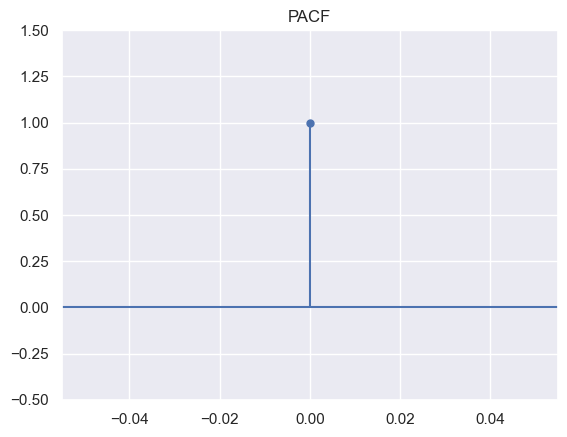

In [16]:
# Plot ACF and PACF
fig, ax = plt.subplots()
plot_pacf(differenced_series, lags=12,title='PACF',ax=ax)
ax.set_ylim(-0.5, 1.5)


plt.show()

In [17]:
p = 0  # AR order
d = 1 # Differencing order
q = 0  # MA order

model = sm.tsa.arima.ARIMA(train_data, order=(p, d, q))
fit_model=model.fit()
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1233
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1888.956
Date:                Wed, 27 Sep 2023   AIC                           3779.913
Time:                        22:29:05   BIC                           3785.029
Sample:                             0   HQIC                          3781.838
                               - 1233                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2568      0.023     54.324      0.000       1.211       1.302
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):              3082.23
Prob(Q):                              0.46   Pr

/Users/katie/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/katie/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/katie/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


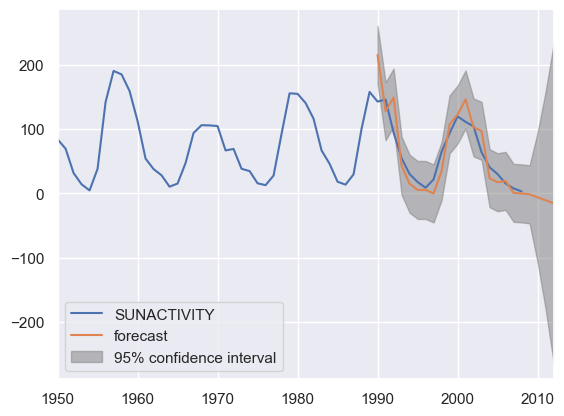

In [18]:
dta = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
dta.index = pd.date_range(start='1700', end='2009', freq='A')
res = sm.tsa.ARIMA(dta, order=(0,2,0)).fit()
fig, ax = plt.subplots()
ax = dta.loc['1950':].plot(ax=ax)
plot_predict(res, '1990', '2012', ax=ax)
plt.show()


In [20]:
predictions = model.predict(fit_model.params, start=1233, end=1761)

NotImplementedError: 

In [138]:
predicted_train = ar1ma.forecast(steps=len(train_data))
# Calculate Mean Squared Error (MSE) on training data
mse_train = mean_squared_error(train_data, predicted_train)
mse_train

3171.3622073839842

In [141]:
predicted_train 

2014-11-26    117.599998
2014-11-27    117.599998
2014-11-28    117.599998
2014-11-29    117.599998
2014-11-30    117.599998
                 ...    
2019-10-13    117.599998
2019-10-14    117.599998
2019-10-15    117.599998
2019-10-16    117.599998
2019-10-17    117.599998
Freq: D, Name: predicted_mean, Length: 1787, dtype: float64

In [ ]:
fig, ax = plt.subplots()
ax = train_data.loc['2010-01-04':].plot(ax=ax, label='Training Data')
plot_predict(, '2014-11-26' ,'2016-12-30', ax=ax,color='red', label='Predictions')
sns.lineplot(data=test_data)

# Add a legend to the top-left corner
ax.legend(loc='upper left')

plt.show()

In [139]:
# Residuals
residuals = ar1ma.resid

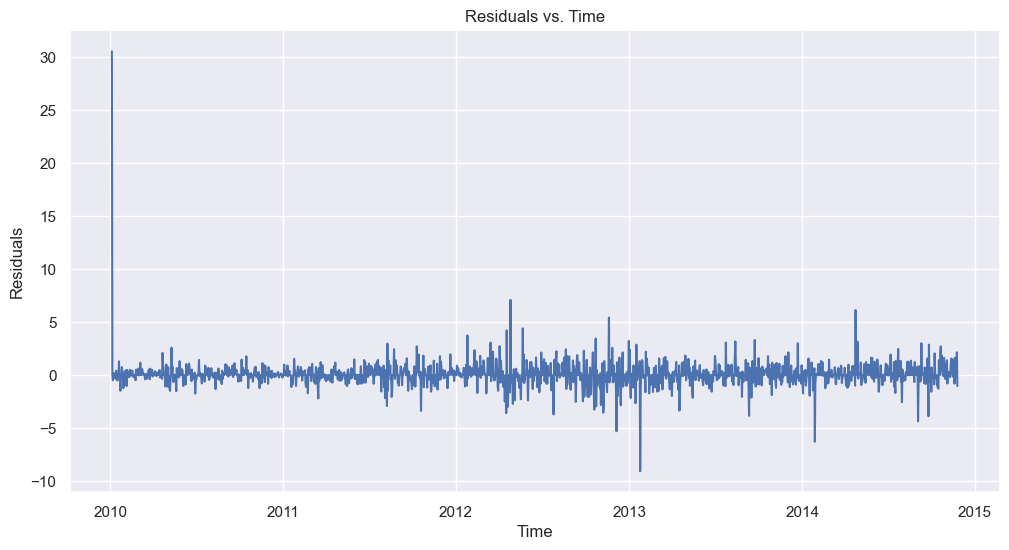

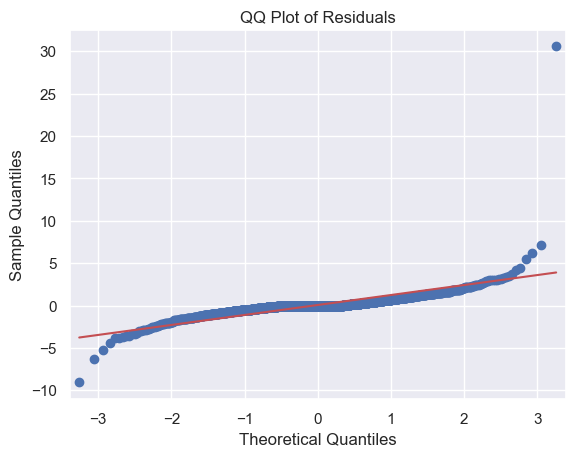

In [140]:
# Residuals vs. Time Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, residuals)
plt.title('Residuals vs. Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# QQ Plot (Quantile-Quantile Plot)
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

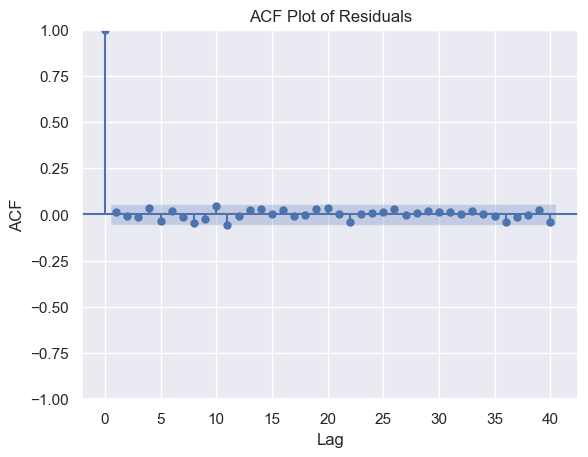

/Users/katie/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


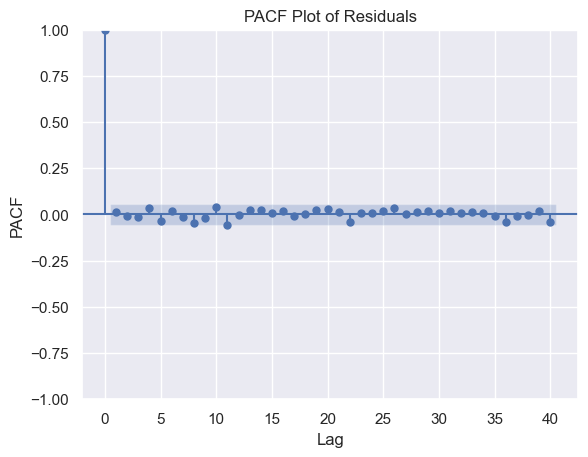

In [83]:
# ACF (Auto-Correlation Function) Plot of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('ACF Plot of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# PACF (Partial Auto-Correlation Function) Plot of Residuals
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.title('PACF Plot of Residuals')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

In [31]:
# Perform the Ljung-Box test on the residuals
# Set lags parameter to the maximum lag you want to test
lags = 20  # Adjust as needed
test_results = acorr_ljungbox(residuals, lags=lags)

In [85]:
p_values = test_results.lb_pvalue